# 学员情况及课程质量分析

![png](./pics/00.png)

## 背景

数据来源于优达学城早期（2014年11月～2015年8月）某个纳米课程的试验数据，学员来自世界各地，课程的学习是不收费的，只有要获取纳米学位的时候才收费。官方只给出了这样的数据，而没有任何分析。那么，假设我是优达学城的分析师，我将如何对这份数据进行分析?

优达学城的一个纳米课程包含几十节课程，每个阶段设置一个项目，而只有完成了所有项目才能获得认证证书。


## 目标

1. 提高学生的任务完成率
2. 提高课程质量


### Data
数据是关于每个学员每天参与情况的记录。

- acct：学员编号	
- utc_date：记录日期	
- num_courses_visited：在这一天，学习的课程数	
- total_minutes_visited：在这一天，总的学习时间	
- lessons_completed:在这一天，课程完成数量
- projects_completed:在这一天，项目完成数量

### 分析思路

#### 学员情况
1. 积极性
  
   1.1 从参与度(活跃天数，学习时间，访问次数)进行分析
  
   1.2 从课程平均访问天数，以及随时间的变化趋势分析
    
2. 影响学员完成任务的因素

   2.1 比较完成至少一个项目的学生与一个项目都未能完成的学生的差别

   2.2 从课程的完成趋势与所花费的时间变化趋势进行比较分析

#### 课程质量
1. 首节课质量如何，是否足够吸引学员

   1.1 从首节课后学员流失率来分析
    
2. 课程是否枯燥
    
    2.1 从每次登录学习的时间长短分析
    
    2.2 从学生课程参与积极性随时间的变化趋势分析
    
3. 课程难易程度如何
    
    3.1 从完成一节课需要花费的平均时间分析
    
    3.2 从完成课程所花的时间随时间变化的趋势分析
    
4. 项目难易程度如何，哪些项目偏难
    
    4.1 从项目完成率分析
    
——————————————————————————————————————
#### 结合数据拆解为以下具体的问题进行分析：
1. 报名却未参加课程，只参加过一次课程的学生占比？找出首次课程流失率。
2. 课程上过两次及以上的学生平均课程访问数，平均花费时间，平均课程完成数，平均项目完成数，平均登录天数是多少？
3. 每次访问课程平均学习时间？登录的每天平均学习的时间？
4. 完成一节课程需要花费的平均时间？
5. 完成不同项目个数的学生所占的比例？
6. 完成至少一个项目的学生与一个项目都无法完成的学生有什么区别？
7. 随着时间推移，学生在学习上的惰性是否越来越大？（从学习时间，课程访问次数，活跃天数来判断）
8. 课程及项目完成数的变化趋势怎样？
9. 课程难度如何？（完成课程所花时间的变化趋势）
10. 能坚持学习到最后的学生有什么特点？（每次登录学习时长的变化趋势）

## 数据清洗

In [1]:
import pandas as pd
import numpy as np

from IPython.display import display
import seaborn as sns
%matplotlib inline


### 1. 数据观察/整理

In [2]:
df = pd.read_csv('daily-engagement.csv')
df.head()

,acct,utc_date,num_courses_visited,total_minutes_visited,lessons_completed,projects_completed
0,0,2015-01-09,1.0,11.679374,0.0,0.0
1,0,2015-01-10,2.0,37.284887,0.0,0.0
2,0,2015-01-11,2.0,53.633746,0.0,0.0
3,0,2015-01-12,1.0,33.489270,0.0,0.0
4,0,2015-01-13,1.0,64.779678,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136240 entries, 0 to 136239
Data columns (total 6 columns):
acct                     136240 non-null int64
utc_date                 136240 non-null object
num_courses_visited      136240 non-null float64
total_minutes_visited    136240 non-null float64
lessons_completed        136240 non-null float64
projects_completed       136240 non-null float64
dtypes: float64(4), int64(1), object(1)
memory usage: 6.2+ MB


In [12]:
# 格式转换
df['utc_date'] = pd.to_datetime(df.utc_date)
df['num_courses_visited'] = df.num_courses_visited.astype('int64')
df['lessons_completed'] = df.lessons_completed.astype('int64')
df['projects_completed'] = df.projects_completed.astype('int64')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136240 entries, 0 to 136239
Data columns (total 6 columns):
acct                     136240 non-null int64
utc_date                 136240 non-null datetime64[ns]
num_courses_visited      136240 non-null int64
total_minutes_visited    136240 non-null float64
lessons_completed        136240 non-null int64
projects_completed       136240 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 6.2 MB


In [15]:
# 缺失值检测
df.isnull().sum()

acct                     0
utc_date                 0
num_courses_visited      0
total_minutes_visited    0
lessons_completed        0
projects_completed       0
dtype: int64

In [17]:
df.describe()

,acct,num_courses_visited,total_minutes_visited,lessons_completed,projects_completed
count,136240.000000,136240.000000,136240.000000,136240.000000,136240.000000
mean,449.069488,0.341060,24.551680,0.128795,0.006731
std,321.104209,0.624565,62.102959,0.469311,0.085108
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,200.000000,0.000000,0.000000,0.000000,0.000000
50%,392.000000,0.000000,0.000000,0.000000,0.000000
75%,597.000000,1.000000,7.307366,0.000000,0.000000
max,1305.000000,10.000000,1030.883197,17.000000,3.000000


通过初步观察，没有存在什么异常数值，但整体呈现较严重的偏态分布。

In [24]:
# 判断那天用户是否活跃，活跃则用1标记，否则用0
df['actived'] = df.num_courses_visited.map(lambda x:1 if x>0 else 0)
df.head(3)

,acct,utc_date,num_courses_visited,total_minutes_visited,lessons_completed,projects_completed,actived
0,0,2015-01-09,1,11.679374,0,0,1
1,0,2015-01-10,2,37.284887,0,0,1
2,0,2015-01-11,2,53.633746,0,0,1


In [71]:
# 课程开始的时间
display(df.utc_date.min())
# 课程结束的时间
display(df.utc_date.max())

Timestamp('2014-11-05 00:00:00')

Timestamp('2015-08-27 00:00:00')

### 2. 上面的数据粒度是每天参与情况，现转换成每位用户

#### 2.1 进行转换

In [25]:
df_users = df.groupby('acct').sum()
df_users.head()

,num_courses_visited,total_minutes_visited,lessons_completed,projects_completed,actived
acct,,,,,
0,108,7605.371411,40,2,88
1,52,4296.244476,23,0,36
2,39,2977.430045,9,0,29
3,59,4422.018919,42,2,50
4,40,3722.648850,18,0,35


#### 2.2 判断学生是否完成了纳米学位所有项目

一个纳米学位中包含多个项目，一个项目又包含多节课，学生只有完成了这个纳米学位中的所有项目，才能获得纳米学位。

这是同一个纳米学位的数据，因此最大项目数就是这个纳米学位总项目数。

In [79]:
# 求出总项目数
df_users.projects_completed.max()

8

In [26]:
# 求出每个学生是否完成了纳米学位所有项目，完成的用1表示，未完成用0表示
df_users['completed'] = df_users.projects_completed.map(lambda x:1 if x==8 else 0)
df_users.head(3)

,num_courses_visited,total_minutes_visited,lessons_completed,projects_completed,actived,completed
acct,,,,,,
0,108,7605.371411,40,2,88,0
1,52,4296.244476,23,0,36,0
2,39,2977.430045,9,0,29,0


现在各属性变量的含义变成如下：

- acct：学生编号
- num_courses_visited：指定学生在整个课程期间，参与总次数
- num_courses_visited：指定学生在整个课程期间，学习总时长
- lessons_completed：指定学生在整个课程期间，完成的课程总节数
- projects_completed：指定学生在整个课程期间，完成的项目总数
- actived：指定学生在整个课程期间，参与的总天数
- completed：指定学生，是否完成了整个纳米学位

In [40]:
# 将数据进行保存
df_users.to_csv('users.csv')

### 3. 将数据粒度为每天参与情况转换成每天学生总体情况

In [30]:
df_date = df.groupby('utc_date').sum()
df_date.tail()

,acct,num_courses_visited,total_minutes_visited,lessons_completed,projects_completed,actived
utc_date,,,,,,
2015-08-23,306279,84,3329.098362,15,0,83
2015-08-24,303495,111,3769.397642,16,0,101
2015-08-25,302691,122,3569.667236,17,0,113
2015-08-26,301090,153,8364.445907,38,0,128
2015-08-27,298599,106,5576.232321,34,0,88


In [ ]:
# 由于“acct”在这里是这一天参与的所有学生编号的总和，没有什么实际意义，因此进行删除
df_date.drop('acct',axis=1,inplace=True)

现在各属性变量的含义变成如下：

- utc_date：学生参与课程的时间
- num_courses_visited：这一天，学生参与总次数
- total_minutes_visited：这一天，学生学习总时长
- lessons_completed：这一天，学生完成的课程总节数
- projects_completed：这一天，学生完成的项目总数
- actived：这一天，学习课程的学生总数

In [50]:
# 将数据进行保存
df_date.to_csv('date.csv')

## 数据分析
主要从以下方面进行分析：

1. 报名却未参加课程，只参加过一次课程的学生占比？找出首次课程流失率。
2. 课程上过两次及以上的学生平均课程访问数，平均花费时间，平均课程完成数，平均项目完成数，平均登录天数是多少？
3. 每次访问课程平均学习时间？登录的每天平均学习的时间？
4. 完成一节课程需要花费的平均时间？
5. 完成不同项目个数的学生所占的比例？
6. 完成至少一个项目的学生与一个项目都无法完成的学生有什么区别？
7. 随着时间推移，学生在学习上的惰性是否越来越大？（从学习时间，课程访问次数，活跃天数来判断）
8. 课程及项目完成数的变化趋势怎样？
9. 课程难度如何？（完成课程所花时间的变化趋势）
10. 能坚持学习到最后的学生有什么特点？（每次登录学习时长的变化趋势）

In [68]:
df_users = pd.read_csv('users.csv',dtype={'acct': str})
df_users.head()

,acct,num_courses_visited,total_minutes_visited,lessons_completed,projects_completed,actived,completed
0,0,108,7605.371411,40,2,88,0
1,1,52,4296.244476,23,0,36,0
2,2,39,2977.430045,9,0,29,0
3,3,59,4422.018919,42,2,50,0
4,4,40,3722.648850,18,0,35,0


##### 画出散布矩阵图，来观察各属性变量的分布情况，以及两两间的关系

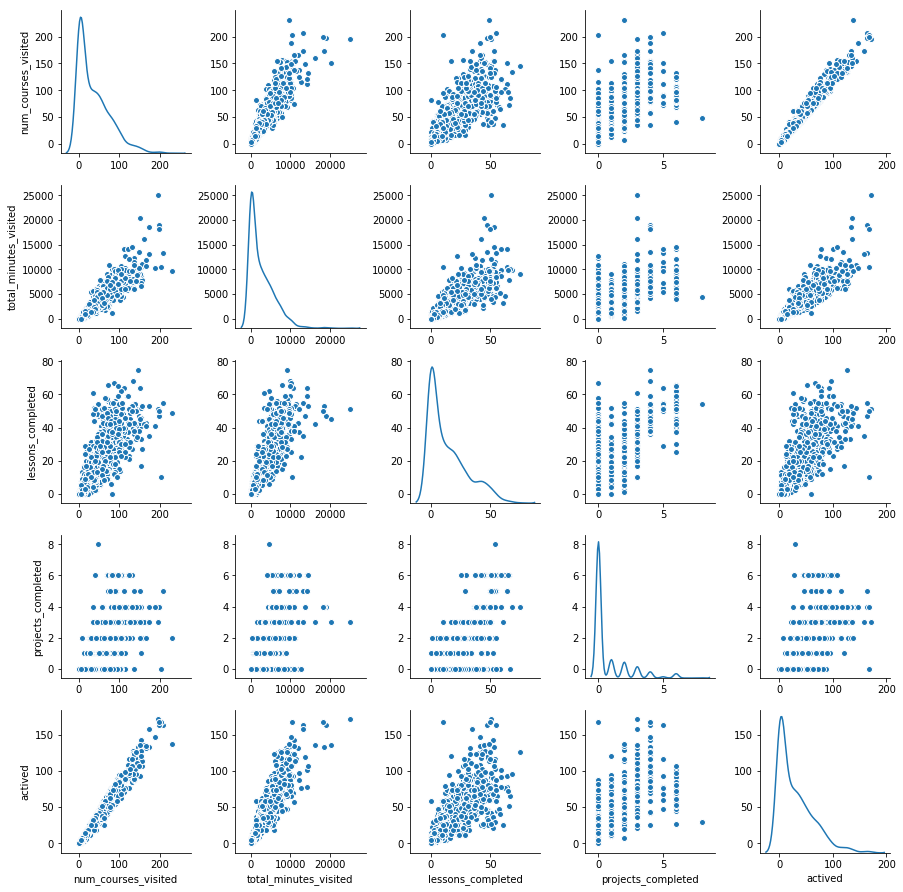

In [136]:
sns.pairplot(df_users[['num_courses_visited','total_minutes_visited','lessons_completed','projects_completed','actived']], diag_kind = 'kde') 

各属性变量呈严重偏态分布。

#### 观察数据的描述统计情况

In [77]:
df_users.describe()

,num_courses_visited,total_minutes_visited,lessons_completed,projects_completed,actived,completed
count,1237.000000,1237.000000,1237.000000,1237.000000,1237.000000,1237.000000
mean,37.563460,2704.058907,14.185125,0.741310,30.202102,0.000808
std,39.973841,3145.365214,16.023663,1.397877,32.577484,0.028433
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,91.728408,0.000000,0.000000,2.000000,0.000000
50%,27.000000,1710.297981,9.000000,0.000000,20.000000,0.000000
75%,60.000000,4437.928592,23.000000,1.000000,49.000000,0.000000
max,231.000000,25114.224586,75.000000,8.000000,171.000000,1.000000


In [131]:
# 检查是否有异常值
display(df_users[df_users.num_courses_visited==0].shape[0])
display(df_users[df_users.total_minutes_visited==0].shape[0])
display(df_users[df_users.actived==0].shape[0])

69

69

69

数据中存在‘num_courses_visited’为0的情况，也就是说有学生学习课程的次数为0，这部分的学生是报了名，但是未进行学习的学生。

通过检查学习次数为0的人数与学习时间为0的人数相同，同时也与参加天数为0的人数相同，因此判断这部分数据没有异常。

In [126]:
# 查看‘num_courses_visited’为0的数据
print('一次都没有上过课的人数为：{}'.format(df_users[df_users.num_courses_visited==0].shape[0]))
print('占总人数的{:.2%}'.format(df_users[df_users.num_courses_visited==0].shape[0] / df_users.shape[0]))

一次都没有上过课的人数为：69
占总人数的5.58%


In [135]:
# 查看‘num_courses_visited’为1的数据
print('只试听过一次课的人数为：{}'.format(df_users[df_users.num_courses_visited==1].shape[0]))
print('占总人数的{:.2%}'.format(df_users[df_users.num_courses_visited==1].shape[0] / df_users.shape[0]))

只试听过一次课的人数为：126
占总人数的10.19%


### 1.  报名却未参加课程，只参加过一次课程, 参加过两次以上课程的学生占总学生的比例
![png](./pics/01.png)

** 分析： **

学生平均上课次数为37次，但这里面包括了一次都没参加课程的学生和只试听过一次课的学生。

有5.58%的学生只是报名，但是不会参与课程；有10.19%的学生在试听过第一次课之后就放弃继续学习这门课；有84.24的学生会参与两次及以上课程。

这门课程首节课的吸引程度还不够，在第一节就失去了10%左右的学生，因此可以通过提高首节课的质量来吸引更多学生。

### 2. 课程上过两次及以上的学生平均课程访问数，平均花费时间，平均课程完成数，平均项目完成数，平均登录天数如何？
#### 筛选出参加课程2次及以上的学生


In [137]:
df_users = df_users[df_users.num_courses_visited>1]
df_users.shape[0]

1042

In [138]:
df_users.describe()

,num_courses_visited,total_minutes_visited,lessons_completed,projects_completed,actived,completed
count,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000
mean,44.472169,3206.985829,16.833013,0.880038,35.733205,0.000960
std,39.926345,3184.388645,16.134668,1.482529,32.646505,0.030979
min,2.000000,4.372465,0.000000,0.000000,1.000000,0.000000
25%,9.000000,452.975181,2.000000,0.000000,7.000000,0.000000
50%,36.000000,2375.892921,13.000000,0.000000,28.000000,0.000000
75%,68.750000,5029.024128,27.000000,1.000000,54.000000,0.000000
max,231.000000,25114.224586,75.000000,8.000000,171.000000,1.000000


** 分析 **

平均课程访问次数约为44，平均花费时间约3206分钟，平均课程完成约17节，平均项目完成约1个(实际0.88个)，平均登录天数约为36天。

整个课程为295天，但是平均登录天数只有36天，大部分学生一个项目都无法完成，可见能坚持到最后的学生非常少，督促学生持续学习非常重要。

### 3. 每次访问课程平均学习时间？登录的每天平均学习的时间？

In [148]:
print('平均每次访问课程学习的时间为：{:.2f}'.format(df_users.total_minutes_visited.sum() / df_users.num_courses_visited.sum()))
print('登录的每天平均学习的时间为：{:.2f}'.format(df_users.total_minutes_visited.sum() / df_users.actived.sum()))

平均每次访问课程学习的时间为：72.11
登录的每天平均学习的时间为：89.75


** 分析 **

从平均每次访问课程学习的时间，以及登录的每天平均学习的时间来看，说明学生只要当天访问了课程，进行学习的时间并不少均大于1个小时，可见并非因为课程非常枯燥，结合前面的分析结果——参与度不足。可以采取社群交流，定时督促等手段帮助学生提高学习的频率。

### 4. 完成一节课程需要花费的平均时间？

In [149]:
print('完成一节课程需要花费的平均时间为：{:.2f}'.format(df_users.total_minutes_visited.sum() / df_users.lessons_completed.sum()))

完成一节课程需要花费的平均时间为：190.52


** 分析 **

一节课需要190多分钟，这个时间是有些长了，说明对于大部分学生来说，一个内容需要反复多看几次才能理解，课程难度对于大部分学生来说是有些难的，可以稍微降低课程难度或为学生补充更多的基础知识。

### 5. 完成不同项目个数的学生所占的比例？

![png](./pics/02.png)
![png](./pics/03.png)

** 分析 **

近65%的学生连一个项目都无法完成。而在完成至少一个项目的学生中仅仅有0.27%的人完成了所有的8个项目。完成率非常低，一方面是由于项目确实有一定难度，另一方面是由于随着时间推移，人的惰性越来越大。

从第一个项目到第二个项目，完成的学生减少了%4～5%；第二到第三个项目减少了7%～8%；第三个项目到第四个项目减少了8%～9%；第四到第五个项目减少了7%～8%；第五到第六个项目反而上升了5%～6%；完成了第七个项目的学生都完成了第八个。说明第3，4，5，7这几个项目都是比较难的，第七个项目也许与第8个项目有很大的相关性。对于这种情况，也许能通过降低项目难度来提高学生的积极性。

### 6. 完成至少一个项目的学生与一个项目都无法完成的学生有什么区别？

![png](./pics/04.png)

** 分析 **

从上图中可以看到，完成一个以上项目的学生无论从总学习时间，访问次数，还是活跃天数都远远大于未能完成任何项目的学生。

因此提高总学习时间，访问次数，以及活跃天数是提高项目完成度的关键因素。


### 7. 随着时间推移，学生在学习上的惰性是否越来越大？

![png](./pics/05.png)

** 分析 **

从图中可以观察到学习时间，课程访问次数，活跃天数呈现较一致的趋势，它们并非随着时间的推移而减少。这证明了大部分学生并非因为惰性越来越大而无法完成任务，同时也说明随着课程学习的深入，内容上对学生来说还是比较有吸引力的。那么影响学生不能完成任务的因素很可能是课程太难或者项目太难。


### 8. 课程及项目完成数量的变化趋势怎样？

![png](./pics/06.png)

** 分析 **

课程的完成数量与学生的积极程度呈现较一致的趋势。可见花的时间越多，课程的完成数量就越多。

项目完成数在4月份达到了最高值，经过了一定时间的积累学生们逐渐完成了第一个项目，然而4月份之后开始下降，说明对大部分学生来说项目过难或是没有吸引力，这也是学生无法完成任务的主要原因。

### 9. 课程难度如何？
![png](./pics/07.png)

** 分析 **

完成课程所花的时间虽然有一定波动，但并没有呈现明显的升高或降低的趋势，说明对学生而言，课程并没有越来越难或越来越容易。



### 10. 能坚持学习到最后的学生有什么特点？

![png](./pics/08.png)

** 分析 **

”平均每次登录的学习时间“这部分统计的是登录课程进行学习的学生，结合之前的观察，在课程最后一个月，总体学习的时间在下降，但是这部分学生反而比以往更加努力。说明大部分学生因为无法完成项目而在最后阶段放弃了学习，但是能继续坚持到最后的学生反而比以往花费更多时间学习。所以在最后一个月可以采取不同于以往的鼓励措施帮助学生坚持学习。

## 总结及建议
1. 听完第一节课后流失了10%左右的学生，可以通过提高首节课的质量来吸引更多学生。
2. 学生总体的积极性不高（平均访问课程天数只有36天），因此平常要对学生加以督促，可以采取社群交流，定时督促等手段帮助学生提高学习的频率。
3. 学生每次登录课程后的学习时间均大于1小时，说明课程并非特别枯燥。
4. 学生完成一节课需要花费的时间较多，说明对于大部分学生来说，一个内容需要反复多看几次才能理解，课程难度对于大部分学生来说偏难，可以稍微降低课程难度或为学生补充更多的基础知识。
5. 对于学生来说比较难的项目有：3，4，5，7，对于这种情况，也许能通过降低项目难度来提高学生的积极性。
6. 因此提高总学习时间，访问次数，以及活跃天数是提高项目完成度的关键因素。
7. 学员的积极性并不会随着时间的推移而有所降低。
8. 完成课程所花的时间虽然有一定波动，但并没有呈现明显的升高或降低的趋势，说明对学生而言，课程并没有越来越难或越来越容易。
9. 积极性越高，课程完成数就越多，但学完课程不一定能完成项目。
10. 坚持学到最后的学生，在最后阶段有更高的积极性。